<a href="https://colab.research.google.com/github/svg0016/PythonProject/blob/main/AmazonStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program uses 

#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#Get the stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2018-01-01', end= '2020-12-16')

#Show the data
df



In [ ]:
#Get the number of rows and colums in the data set
df.shape

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('ClosingPrice ($)USD', fontsize= 18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*.8)

training_data_len

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create the traiing data set
#Creat the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i,0])

    if i<=51:
        print(x_train)
        print(y_train)
        print()


In [31]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [33]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(548, 50, 1)

In [36]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [41]:
#Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error')


In [42]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

548/548 [==============================] - 13s 18ms/step - loss: 0.0044


In [57]:
#Create the testing data set
#Create a new array conaining scaled values from index 548 747
test_data = scaled_data[training_data_len - 50: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(50, len(test_data)):
  x_test.append(test_data[i-50:i, 0])



In [58]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [59]:
#Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#x_test.shape[0] = number of rows
#x_test.shape[1] = number of columns/timestamps
#1 = number of features, close price


In [68]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Unscaling the predictions


In [69]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test )**2)
rmse

62.38138206533137

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


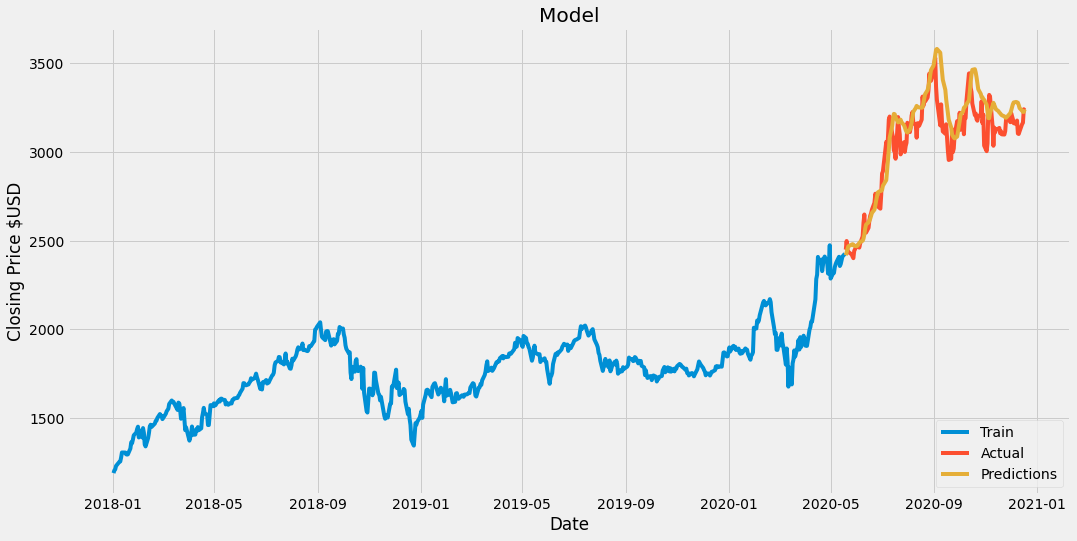

In [72]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price $USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual','Predictions'],loc= 'lower right' )
plt.show()

In [73]:
#Show the valid and predicted prices

valid


,Close,Predictions
Date,,
2020-05-19,2449.330078,2417.993896
2020-05-20,2497.939941,2432.219971
2020-05-21,2446.739990,2453.021240
2020-05-22,2436.879883,2468.074219
2020-05-26,2421.860107,2477.195557
...,...,...
2020-12-11,3116.419922,3247.760010
2020-12-14,3156.969971,3232.552490
2020-12-15,3165.120117,3225.997803


In [78]:
#Get the quote
amzn_quote = web.DataReader('AMZN', data_source='yahoo', start='2018-01-01', end='2020-12-16')
#Create a new dataframe
new_df = amzn_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3260.079]]
